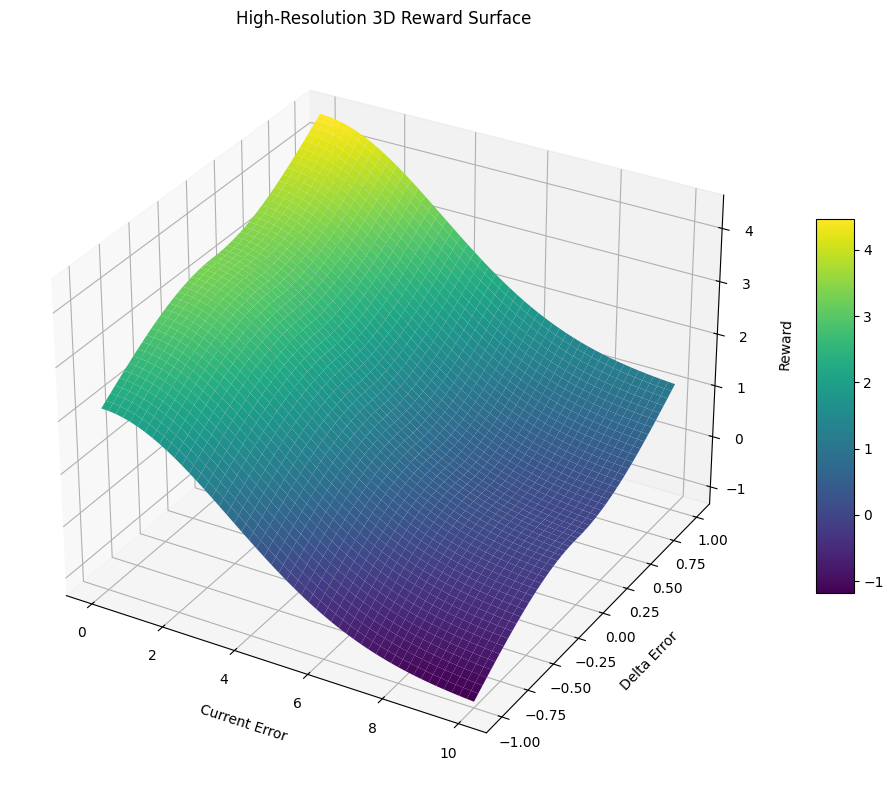

In [18]:
import numpy as np
import matplotlib.pyplot as plt
Mean = 0
sigma_E = 3.5
sigma_T = 1
scale_T = 0.3
base = -0.01

# High-resolution grid
current_error = np.linspace(0, 10, 1000)
Delta_Error = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(current_error, Delta_Error)

# Reward components
Error_Reward = (1 / (np.sqrt(2 * np.pi * sigma_E**2))) * np.exp(- (X - Mean)**2 / (2 * sigma_E**2))
Tracking_Error = np.sign(Y) * (scale_T * (1 - np.exp(-Y**2 / (2 * sigma_T**2)))) + base

Z = (Error_Reward*3 + Tracking_Error)*10

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')


ax.set_xlabel('Current Error', labelpad=10)
ax.set_ylabel('Delta Error', labelpad=10)
ax.set_zlabel('Reward', labelpad=10)
ax.set_title('High-Resolution 3D Reward Surface')


fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Tidy layout
plt.tight_layout()
plt.show()

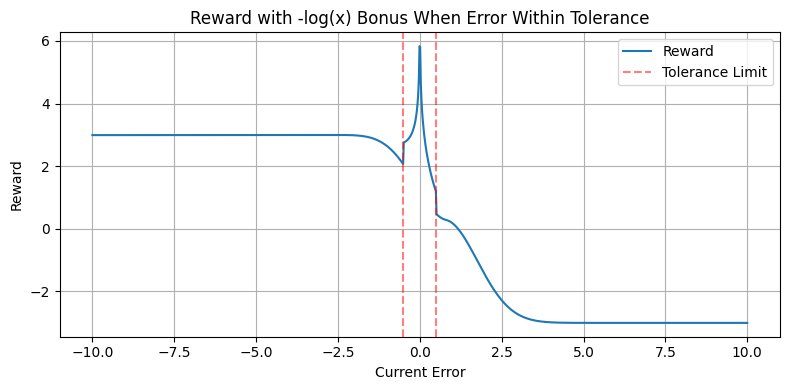

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def reward_function(Previous_Error, Current_Error):
    Mean = 0
    sigma_E = 1
    sigma_T = 1
    scale_T = 3
    base = -0.01
    tolerance = 0.5
    epsilon = 1e-6  # เพื่อป้องกัน log(0)

    # Error ต่าง ๆ
    Delta_Error = Previous_Error - Current_Error

    # Gaussian Error Reward
    Error_Reward = (1 / (np.sqrt(2 * np.pi * sigma_E**2))) * \
                   np.exp(- (Current_Error - Mean)**2 / (2 * sigma_E**2))

    # Tracking Reward
    Tracking_Reward = np.sign(Delta_Error) * \
                      (scale_T * (1 - np.exp(-Delta_Error**2 / (2 * sigma_T**2)))) + base

    # Extra Reward แบบ -log(x) เมื่อ error เข้าใกล้เป้าหมาย (<= tolerance)
    if np.abs(Current_Error) < tolerance:
        x = np.abs(Current_Error) + epsilon  # เพื่อให้ไม่เข้า log(0)
        Bonus_Reward = -np.log(x)  # ยิ่ง x เล็ก (error ใกล้ 0) → bonus ยิ่งมาก
    else:
        Bonus_Reward = 0.0

    reward = Error_Reward + Tracking_Reward + Bonus_Reward
    return reward

# ทดลอง Current_Error ในช่วง [-2, 2]
errors = np.linspace(-10, 10, 1000)
previous_error = 0.8  # สมมติให้ค่าคงที่
rewards = [reward_function(previous_error, ce) for ce in errors]

plt.figure(figsize=(8, 4))
plt.plot(errors, rewards, label="Reward")
plt.axvline(-0.5, color='red', linestyle='--', alpha=0.5, label="Tolerance Limit")
plt.axvline(0.5, color='red', linestyle='--', alpha=0.5)
plt.title("Reward with -log(x) Bonus When Error Within Tolerance")
plt.xlabel("Current Error")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

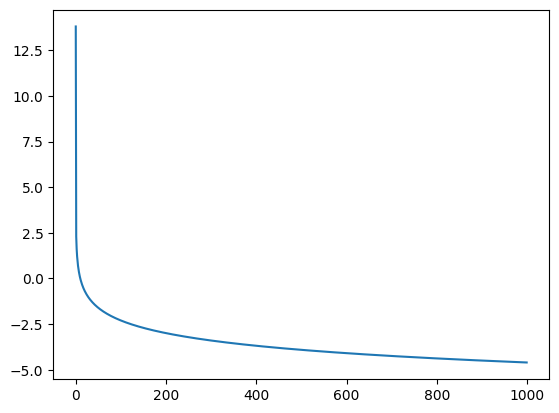

In [31]:
import numpy as np
import matplotlib.pyplot as plt

error = np.linspace(0,100,1000)
p = error

reward = -np.log((error+1e-6))
plt.plot(reward)

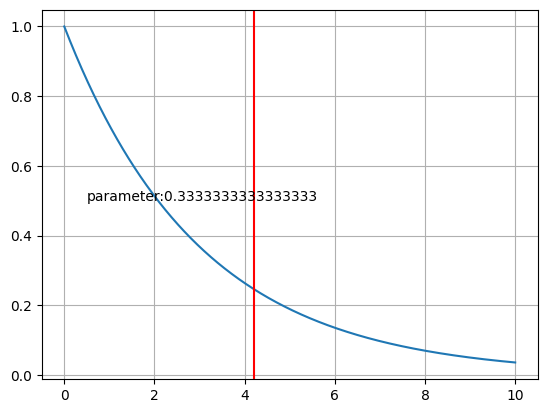

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Max_error = 10
parameter = Max_error / (0.3 * Max_error**2)
error = np.linspace(0,Max_error,1000)
reward = np.exp(-(parameter)*(error))
p = error

setpoint = 5
state = 0.8
erorr_user = setpoint - state

plt.plot(p,reward)
plt.axvline(erorr_user,color= 'r')
plt.text(0.5,0.5,f"parameter:{parameter}")
plt.grid()
plt.show()
#Max 1 = 1/0.3 = 3.333 , 10= 10/30 = 0.333 ,100 = 100/3000 = 0.033

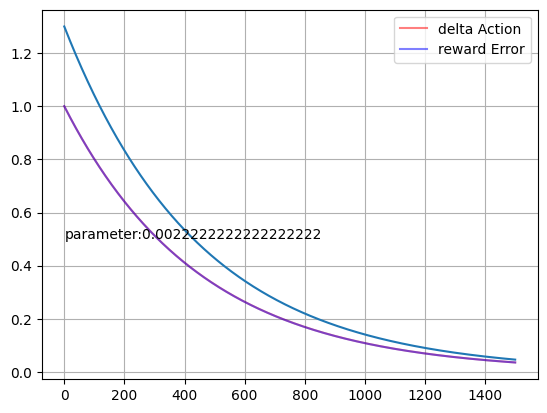

In [16]:
import numpy as np
import matplotlib.pyplot as plt
Max_error = 1500
parameter = Max_error / (0.3 * Max_error**2)


error = np.linspace(0,Max_error,1000)
delta_Acton =  np.linspace(0,1,1000)
reward_Action = np.exp(-(3.33) * (delta_Acton))
reward = np.exp(-(parameter)*(error))
p = error

total_reward = reward + (0.3 * reward_Action)
plt.plot(p,reward_Action,color='r',label='delta Action',alpha=0.5)
plt.plot(p,reward,color='b',label='reward Error',alpha=0.5)
plt.plot(p,total_reward)
plt.text(0.5,0.5,f"parameter:{parameter}")
plt.grid()
plt.legend()
plt.show()

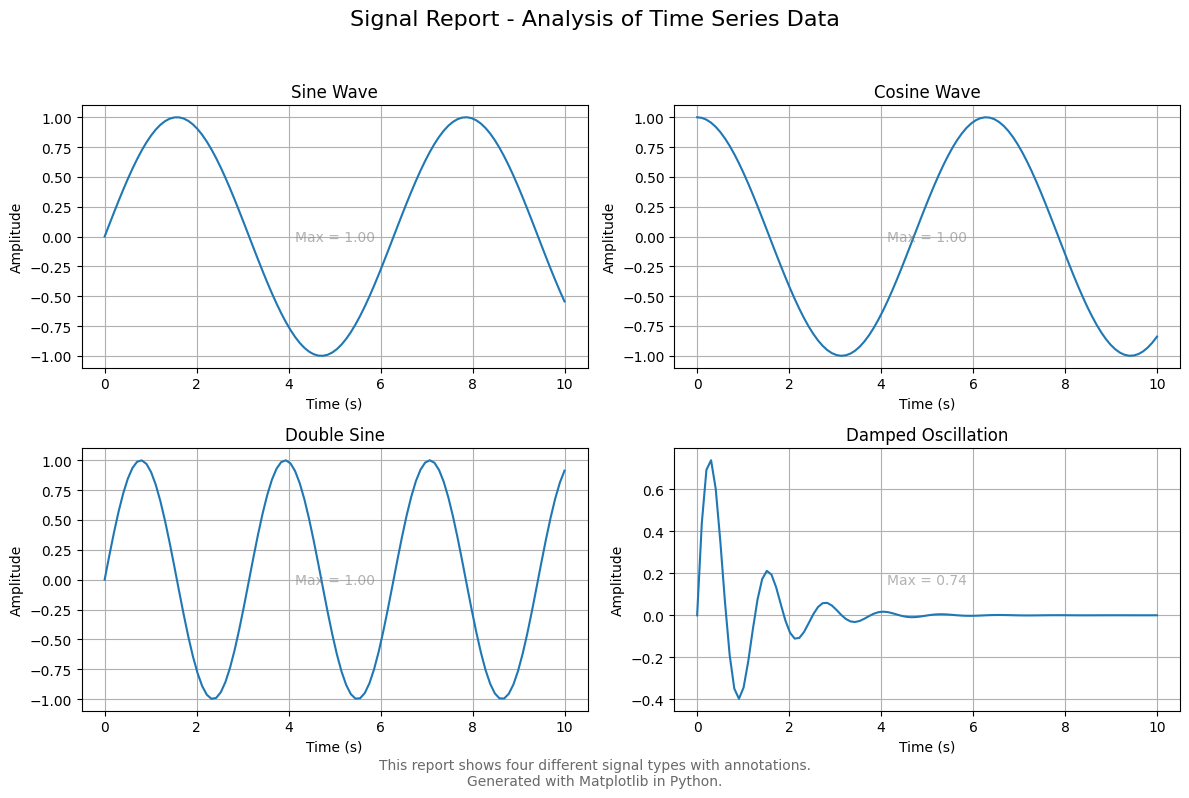

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# ตัวอย่างข้อมูล
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2*x)
y4 = np.exp(-x) * np.sin(5*x)

# สร้าง figure และ subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# ตั้งชื่อกราฟและ plot ข้อมูล
titles = ["Sine Wave", "Cosine Wave", "Double Sine", "Damped Oscillation"]
data = [y1, y2, y3, y4]

for i in range(4):
    axs[i].plot(x, data[i])
    axs[i].set_title(titles[i])
    axs[i].grid(True)
    axs[i].set_xlabel("Time (s)")
    axs[i].set_ylabel("Amplitude")
    axs[i].text(0.5, 0.5, f"Max = {np.max(data[i]):.2f}", 
                transform=axs[i].transAxes, fontsize=10,
                ha='center', va='center', color='gray', alpha=0.6)

# ใส่หัวข้อรวมของ report
fig.suptitle("Signal Report - Analysis of Time Series Data", fontsize=16)

# ข้อความอธิบายใต้กราฟ (แนว bottom-right)
fig.text(0.5, 0.01, "This report shows four different signal types with annotations.\nGenerated with Matplotlib in Python.",
         ha='center', fontsize=10, color='dimgray')

# จัดระยะห่างให้อัตโนมัติ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # ให้เว้นที่หัวไว้ด้วย

# บันทึกเป็น PDF หรือ PNG
fig.savefig("signal_report.pdf")
plt.show()


Step Response Information:
Start_Fall: None
End_Fall: None
Start_Rise: 48
End_Rise: 168
Where_Max_Overshoot: 315
Where_Max_Undershoot: 631
Percent_Overshoot: 28.915593473920392
Percent_Undershoot: 30.649699931907314
Settling_Time: None
Steady_State: 1.0585379558607786
Upper_Tolerance: 1.0797087149779943
Lower_Tolerance: 1.037367196743563
Offset: -0.05853795586077859
Size_data: 1000
Reward for Control Performance: 32085.09696169061


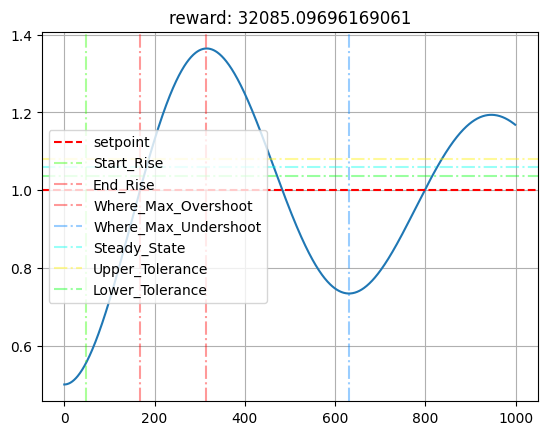

In [15]:
import numpy as np
import matplotlib.pyplot as plt

List_key_ax = ['Start_Fall','End_Fall',
                'Start_Rise','End_Rise',
                'Where_Max_Overshoot','Where_Max_Undershoot','Settling_Time'
                ]

List_key_ah = ['Steady_State', 'Upper_Tolerance', 'Lower_Tolerance',]

color_list={'Start_Fall':"#00ff04",'End_Fall':"#ff0000",'Start_Rise':"#2fff00",'End_Rise':"#ff0000",
            'Where_Max_Overshoot':"#ff0000",'Where_Max_Undershoot':"#0084ff",'Settling_Time':"#00fbff",
            'Steady_State':"#00ffee", 'Upper_Tolerance':"#fff200", 'Lower_Tolerance':"#00ff11"
            }

zeta = 0.1             # damping ratio (ต้อง < 1 สำหรับ underdamped)
omega_n = 0.5           # natural frequency
omega_d = omega_n * np.sqrt(1 - zeta**2)

# ค่าเริ่มต้น
y0 = 0.5                # initial value at t = 0
y_ss = 1              # steady state value

# เวลา
t = np.linspace(0, 20, 1000)

# ฟังก์ชันการตอบสนองแบบ underdamped ที่เริ่มต้นที่ y0 แล้วเข้าใกล้ y_ss
A = y0 - y_ss
y = y_ss + A * np.exp(-zeta * omega_n * t) * (
    np.cos(omega_d * t) + (zeta / np.sqrt(1 - zeta**2)) * np.sin(omega_d * t)
)

def stepinfo(history,setpoint,tolerance = 0.02,consecutive = 0.3):
        
        count = len(history)
        consecutive_step = round(count * consecutive)

        #find the steady state
        referRence_yss = None
        settling_time = None
        y_ss = np.mean(history[-(consecutive_step):])

        tolerance_band = np.abs(y_ss) * tolerance
        upper_bound = (y_ss + tolerance_band)
        lower_bound = (y_ss - tolerance_band)
        count_ss = 0
        for i,history_list in enumerate(history):
            if lower_bound <= history_list <= upper_bound:
                count_ss +=1
            else:
                count_ss = 0
            if count_ss >= (consecutive_step):
                    settling_time = i - (consecutive_step - 1)
                    break
            
    
        if isinstance(settling_time,int):
            referRence_yss = np.mean(history[settling_time:])
            
            
        else:
            referRence_yss = y_ss
        
        
        #find fall time  of process
        upper_fall = float('inf')
        start_fall,end_fall = None,None
        fall_10,fall_90 = 0,0
        count_fall = 0

        for i in range(1,count -1):
            if history[0] <= (referRence_yss + tolerance_band):
                break

            if history[i] < upper_fall:
                upper_fall = history[i]
                count_fall += 1
                end_fall = i

            if history[i] > history[i - 1] and history[i] > upper_fall * 1.001 :
                end_fall = i
                break

            if i > round(consecutive_step * 0.1) and count_fall >= round(consecutive_step * 0.1) and start_fall is None:
                start_fall = round(i - (consecutive_step * 0.1))
        
        if end_fall is not None and start_fall is not None:
            dy_fall = (history[start_fall]) - history[end_fall]
            y_10_fall = 0.1 * dy_fall
            y_90_fall = 0.9 * dy_fall

            dy_10_fall = (history[start_fall] - y_10_fall)
            dy_90_fall = (history[start_fall] - y_90_fall)
            

        
            fall_10 = np.argmin(np.abs(np.array(history[start_fall:end_fall]) - dy_10_fall))
            fall_90 = np.argmin(np.abs(np.array(history[start_fall:end_fall]) - dy_90_fall))
        else:
            pass
        
        
        if fall_10 == fall_90:
            fall_10,fall_90 = None,None

        #find rise time of process
        end_rise = None
        rise_10,rise_90 = None,None

        if (start_fall  is  None) and (end_fall is None):
            for i in range(0,count - 1):
                if history[i] >= referRence_yss:
                    end_rise = i
                    break
        
            dy_rise = referRence_yss - history[0]
            dy_10_rise = 0.1 * dy_rise
            dy_90_rise = 0.9 * dy_rise

            y_10_rise = history[0] + dy_10_rise
            y_90_rise = history[0] + dy_90_rise
            if end_rise > 0:
                rise_10 = np.argmin(np.abs(np.array(history[0:end_rise]) - y_10_rise))
                rise_90 = np.argmin(np.abs(np.array(history[0:end_rise]) - y_90_rise))

                
        
        #find overshoot

        tolerance_band = np.abs(referRence_yss) * tolerance
        upper_bound = (referRence_yss + tolerance_band)
        lower_bound = (referRence_yss - tolerance_band)
    
        where_overshoot = 0
        where_undershoot = 0
        percent_overshoot = 0
        percent_undershoot = 0
        undershoot_list = []
        overshoot_list = []
        start_count_shoot  = 0

        if end_fall is not None and end_fall != 1:
            start_count_shoot = end_fall
        elif end_rise is not None:
            start_count_shoot = end_rise
        else:
            start_count_shoot = 0


        for i in range(start_count_shoot,count -1):
            if history[i] > (upper_bound):
                overshoot_list.append(history[i])
            else:
                overshoot_list.append(float('-inf'))
            
            if history[i] < (lower_bound):
                undershoot_list.append(history[i])
            else:
                undershoot_list.append(float('inf'))

        where_overshoot = np.argmax(overshoot_list)
        where_undershoot = np.argmin(undershoot_list)
        where_overshoot += start_count_shoot
        where_undershoot += start_count_shoot

        if (where_overshoot == 0) or  (history[where_overshoot] < upper_bound) :
            where_overshoot = None

        if (where_undershoot == 0) or (history[where_undershoot] > lower_bound):
            where_undershoot = None

        if where_overshoot is not None:
            percent_overshoot = np.abs(history[where_overshoot] - referRence_yss)/np.abs(referRence_yss) *100

        if where_undershoot is not None:
            percent_undershoot = np.abs(history[where_undershoot] - referRence_yss)/np.abs(referRence_yss) *100

        #find offset
        offset = setpoint - referRence_yss

    
        info = {'Start_Fall':fall_10,
                'End_Fall':fall_90,
                'Start_Rise':rise_10,
                'End_Rise':rise_90,
                'Where_Max_Overshoot':where_overshoot,
                'Where_Max_Undershoot':where_undershoot,
                'Percent_Overshoot':percent_overshoot,
                'Percent_Undershoot':percent_undershoot,
                'Settling_Time':settling_time,
                'Steady_State':referRence_yss,
                'Upper_Tolerance':upper_bound,
                'Lower_Tolerance':lower_bound,
                'Offset':offset,
                'Size_data':count,
                }


        return info

def reward_Control(info : dict):
        
        start_fall,end_fall,start_rise,end_rise  = info.get('Start_Fall',None),info.get('End_Fall',None),info.get('Start_Rise',None),info.get('End_Rise',None)
        percent_overshoot,percent_undershoot,settling_time = info.get('Percent_Overshoot',None),info.get('Percent_Undershoot',None),info.get('Settling_Time',None)
        size_data = info.get('Size_data',None)
        offset = info.get('Offset',0)

        #parameter adjust
        K1,K2,K3 = 0.1,0.8,0.1
        bese_range = size_data * 0.1
        time_start = 0
        All_reward = 0
        
        
        if isinstance(start_fall,(np.integer,np.floating)) and isinstance(end_fall,(np.integer,np.floating)):
            time_start = end_fall - start_fall
        elif isinstance(start_rise,(np.integer,np.floating)) and isinstance(end_rise,(np.integer,np.floating)):
            time_start = end_rise - start_rise
        else:
            return 0
        #print(time_start)
        #parameter adjust
        K1,K2,K3,K4 = 0.3,0.8,0.1,0.5
        bese_range = size_data * 0.1

        # reward_fast = np.exp( -K1 * (time_start / bese_range))
        # reward_over = np.exp( - K2 * (percent_overshoot/100))
        # reward_under = np.exp( -K3 * (percent_undershoot/100))

        reward_fast = - time_start
        reward_over = - percent_overshoot
        reward_under = - percent_undershoot
        reward_offset = - np.abs(offset)

        #reward_over = reward_over if percent_overshoot <= self.spect_overshoot else reward_over * -1 * 10
        #reward_under = reward_under if percent_undershoot <= self.spect_undershoot else reward_under * -1 *10

        All_reward = reward_fast + reward_over + reward_under + reward_offset
        
        if settling_time is None:
            reweard_settling = (All_reward**2)
        else:
            #reweard_settling = np.exp( -K4 * (settling_time / bese_range))
            reweard_settling = - settling_time
        
        return All_reward + reweard_settling

info = stepinfo(y, y_ss)
print("Step Response Information:")
for key, value in info.items():
    print(f"{key}: {value}")    

reward = reward_Control(info)
print(f"Reward for Control Performance: {reward}")

plt.plot(y)
plt.axhline(y_ss,linestyle='--',color="#ff0000",label='setpoint' )

for key in List_key_ax:
    if info.get(key) is not None:
        plt.axvline(info[key], label=key,linestyle='-.',color=color_list.get(key,'-'),alpha=0.4)
for key in List_key_ah:
    plt.axhline(info[key],label=key,linestyle='-.',color=color_list.get(key,'-'),alpha=0.4)

plt.title(f'reward: {reward}')
plt.grid()
plt.legend()
plt.show()

